# 9. 모멘텀의 오묘한 세계(2) - 1990-2018년 라이브 백테스트

[9강의](https://www.youtube.com/watch?v=NIfGhuO6PpE) 를 파이썬으로 구현해보겠습니다.

## 설치

Pandas, Numpy가 있어야 합니다. 설치가 안되어있으시면 다음 셀을 실행시키세요.

In [1]:
import sys
!{sys.executable} -m pip install pandas numpy

## 다운로드

[French Database](http://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html)에서 CSV 파일을 다운받으셔서 푸셔야 합니다. 다음 셀을 실행시켜주세요.

In [2]:
wget http://mba.tuck.dartmouth.edu/pages/faculty/ken.french/ftp/Global_25_Portfolios_ME_Prior_12_2_CSV.zip

In [3]:
! unzip Global_25_Portfolios_ME_Prior_12_2_CSV.zip

## 파일 로딩

파일을 로딩하려고 합니다. 그전에 파일이 어떻게 생겼는지 잠시 살펴보도록 하죠.

In [4]:
! head -15 Global_25_Portfolios_ME_Prior_12_2.csv

파일에 앞부분이 텍스트로 이루어져 있습니다. 그 후에는 테이블이 3개가 있는데요. 우리는 그 중간에 있는 "Equal Weighted" 부분만 사용할 것입니다.

테이블을 pandas 로 로딩후 첫부분, 끝부분 5라인씩 살펴보죠.

In [5]:
import pandas as pd
import numpy as np
%matplotlib inline

In [6]:
filepath = 'Global_25_Portfolios_ME_Prior_12_2.csv'
df = pd.read_csv(filepath, skiprows=355, skipfooter=750, index_col=0, engine='python')
df.head()

,SMALL LoPRIOR,ME1 PRIOR2,ME1 PRIOR3,ME1 PRIOR4,SMALL HiPRIOR,ME2 PRIOR1,ME2 PRIOR2,ME2 PRIOR3,ME2 PRIOR4,ME2 PRIOR5,...,ME4 PRIOR1,ME4 PRIOR2,ME4 PRIOR3,ME4 PRIOR4,ME4 PRIOR5,BIG LoPRIOR,ME5 PRIOR2,ME5 PRIOR3,ME5 PRIOR4,BIG HiPRIOR
199011,-0.08,-0.56,-1.29,-1.21,-0.07,1.42,-1.71,-3.33,-4.28,-2.52,...,-0.78,-4.97,-3.05,-5.47,-6.03,-5.18,-3.80,-3.80,-2.37,-2.51
199012,-3.23,0.53,-0.57,-0.14,0.48,0.44,1.16,0.52,0.49,-1.01,...,1.49,2.04,1.73,0.03,-2.75,4.40,2.95,1.25,0.07,-1.24
199101,5.88,2.03,1.14,0.78,2.05,2.78,-0.36,0.08,-1.50,0.93,...,4.12,0.53,-0.30,0.32,1.00,5.78,3.06,2.76,2.45,3.04
199102,15.75,11.04,8.30,6.15,8.90,18.82,15.11,11.14,10.12,9.63,...,17.06,14.70,11.32,9.66,8.39,14.42,10.84,9.70,7.08,6.79
199103,4.59,1.42,0.92,2.64,6.01,0.07,0.68,0.84,0.87,3.75,...,-2.01,-1.52,-2.17,-0.77,0.22,-3.37,-3.32,-3.66,-2.22,-0.79


In [7]:
df.tail()

,SMALL LoPRIOR,ME1 PRIOR2,ME1 PRIOR3,ME1 PRIOR4,SMALL HiPRIOR,ME2 PRIOR1,ME2 PRIOR2,ME2 PRIOR3,ME2 PRIOR4,ME2 PRIOR5,...,ME4 PRIOR1,ME4 PRIOR2,ME4 PRIOR3,ME4 PRIOR4,ME4 PRIOR5,BIG LoPRIOR,ME5 PRIOR2,ME5 PRIOR3,ME5 PRIOR4,BIG HiPRIOR
201808,-1.66,-1.30,-0.50,-0.94,-0.13,-0.36,-0.49,-0.05,-0.32,3.69,...,-1.23,-1.00,-0.27,0.37,5.06,-1.23,-0.95,0.35,0.33,3.43
201809,-0.45,-0.18,-0.43,0.49,-0.39,-0.29,-0.41,-0.82,-1.21,-0.62,...,-0.02,0.04,-0.91,-0.32,-0.19,0.71,0.36,0.49,0.69,0.88
201810,-10.08,-6.72,-6.74,-8.04,-9.41,-10.51,-8.24,-8.39,-9.05,-13.81,...,-9.37,-8.33,-8.61,-7.91,-12.07,-7.47,-7.53,-7.01,-8.28,-11.24
201811,-1.18,-0.37,-0.59,-1.07,-1.03,0.42,0.62,0.98,0.96,-0.60,...,2.88,0.12,0.77,1.82,-2.59,2.51,1.93,2.13,0.56,-1.35
201812,-9.39,-6.61,-5.61,-4.89,-6.56,-9.94,-8.60,-7.68,-7.00,-9.46,...,-8.53,-8.07,-6.19,-6.96,-6.86,-8.89,-7.17,-7.21,-6.45,-6.19


## 분석함수

analyze() 함수가 강환국님이 라이브 백테스팅 한 내용들이 모두 들어가 있는 함수입니다.

In [8]:
def print_df(df):
    from IPython.core.display import HTML
    display(HTML(df.to_html()))

In [9]:
def analyze(df, weight=12):
    df = (df / 100) + 1
    df = df.cumprod()
    print('이 테이블은 누적 수익률을 보여줍니다. 마지막 5줄만 보여주도록 하겠습니다.')
    print_df(df.tail())
    
    df_cumprod = df
    
    df = df[-1:].pow((1.0 / df.shape[0] * weight), axis=1)
    df = (df - 1) * 100
    df = pd.DataFrame(np.vstack(np.split(df, 5, axis=1)),
                      columns=['저모멘텀', '2', '3', '4', '고모멘텀'],
                      index=['소형주', '2', '3', '4', '대형주'])

    df['고-저'] = df['고모멘텀'] - df['저모멘텀']
    print('위의 테이블의 마지막 열을 꺼내 우선 5열/5행의 테이블로 나눠줍니다. 새 테이블에서 누적 수익률을 복리 퍼센트로 바꿔줍니다. 그리고, 모멘텀 차이를 보여줍니다.')
    print_df(df)
    
    df_cumprod[['SMALL LoPRIOR', 'SMALL HiPRIOR', 'BIG LoPRIOR', 'BIG HiPRIOR']].plot(figsize=(20, 10))
    print('마지막으로 누적 수익률을 차트로 보시죠.')

## 분석

### 1990 년부터 2018년까지 테스트

이 테이블은 누적 수익률을 보여줍니다. 마지막 5줄만 보여주도록 하겠습니다.


,SMALL LoPRIOR,ME1 PRIOR2,ME1 PRIOR3,ME1 PRIOR4,SMALL HiPRIOR,ME2 PRIOR1,ME2 PRIOR2,ME2 PRIOR3,ME2 PRIOR4,ME2 PRIOR5,ME3 PRIOR1,ME3 PRIOR2,ME3 PRIOR3,ME3 PRIOR4,ME3 PRIOR5,ME4 PRIOR1,ME4 PRIOR2,ME4 PRIOR3,ME4 PRIOR4,ME4 PRIOR5,BIG LoPRIOR,ME5 PRIOR2,ME5 PRIOR3,ME5 PRIOR4,BIG HiPRIOR
201808,8.129825,31.395692,67.511966,150.901830,450.843578,2.265959,9.598765,14.857905,26.381488,57.054810,3.242716,9.710908,12.896961,15.218347,28.039689,2.798198,8.877737,12.509028,12.845665,28.585014,3.065789,8.038763,12.271889,15.145255,22.302287
201809,8.093241,31.339180,67.221664,151.641249,449.085288,2.259388,9.559410,14.736070,26.062272,56.701071,3.202830,9.610886,12.796365,15.119428,28.034082,2.797638,8.881288,12.395196,12.804558,28.530702,3.087556,8.067703,12.332022,15.249757,22.498547
201810,7.277442,29.233187,62.690924,139.449293,406.826363,2.021926,8.771714,13.499714,23.703636,48.870653,2.882547,8.712268,11.657488,13.766239,24.678402,2.535499,8.141476,11.327969,11.791718,25.087047,2.856916,7.460205,11.467547,13.987077,19.969710
201811,7.191568,29.125024,62.321048,137.957185,402.636051,2.030418,8.826099,13.632011,23.931191,48.577429,2.932704,8.795906,11.645831,13.727694,24.520460,2.608522,8.151246,11.415195,12.006327,24.437292,2.928624,7.604187,11.711806,14.065405,19.700119
201812,6.516280,27.199860,58.824837,131.211079,376.223126,1.828595,8.067054,12.585072,22.256007,43.982004,2.635034,8.037699,10.811989,12.693999,22.499974,2.386015,7.493441,10.708594,11.170687,22.760894,2.668270,7.058967,10.867384,13.158186,18.480682


위의 테이블의 마지막 열을 꺼내 우선 5열/5행의 테이블로 나눠줍니다. 새 테이블에서 누적 수익률을 복리 퍼센트로 바꿔줍니다. 그리고, 모멘텀 차이를 보여줍니다.


,저모멘텀,2,3,4,고모멘텀,고-저
소형주,6.880727,12.442725,15.564552,18.903385,23.434322,16.553595
2,2.165895,7.693890,9.407761,11.644765,14.377638,12.211743
3,3.499716,7.679952,8.819495,9.441241,11.687987,8.188271
4,3.135580,7.412240,8.782378,8.945661,11.733714,8.598134
대형주,3.545783,7.184706,8.839241,9.580877,10.910391,7.364608


마지막으로 누적 수익률을 차트로 보시죠.


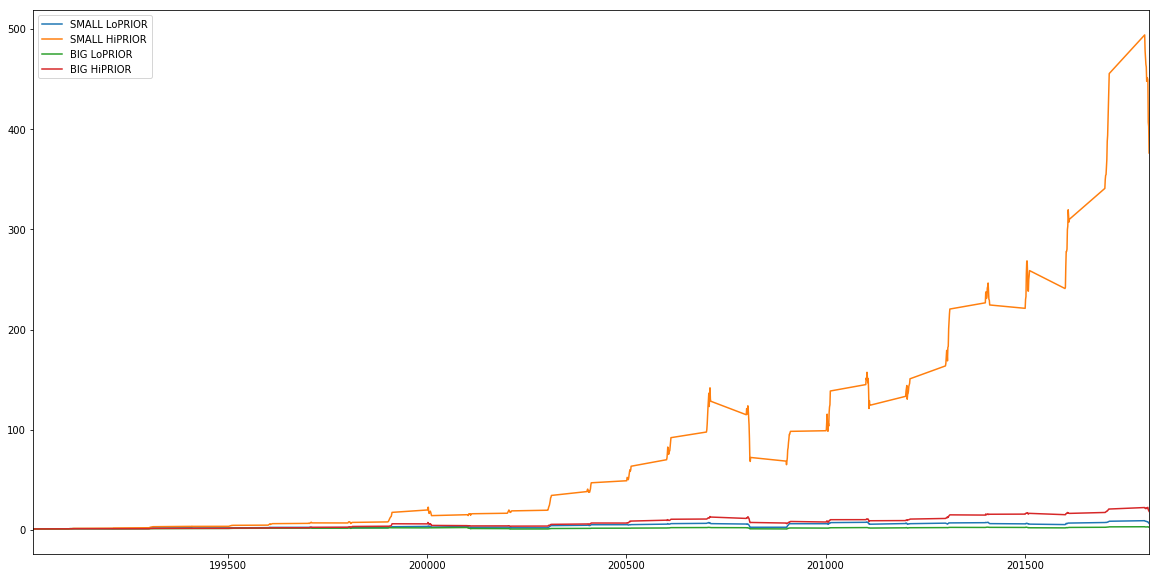

In [10]:
analyze(df)

동영상의 결과와 비슷합니다. 단, 여기서는 2018년 12월까지 한달을 더 보여주기 때문에 소형주, 고 모멘텀의 수익률이 11월의 402 (엑셀에서는 405) 에서 376 으로 낮아졌습니다. (2018년 10월~12월에 엄청 떨어졌죠.)

두번째 테이블을 보시죠. 분석해주신 것처럼, <span style="color:red">**고모멘텀, 소형주의 복리가 23.35%로 좋습니다.**</span>

### 1990 년부터 2003년까지 테스트

이 테이블은 누적 수익률을 보여줍니다. 마지막 5줄만 보여주도록 하겠습니다.


,SMALL LoPRIOR,ME1 PRIOR2,ME1 PRIOR3,ME1 PRIOR4,SMALL HiPRIOR,ME2 PRIOR1,ME2 PRIOR2,ME2 PRIOR3,ME2 PRIOR4,ME2 PRIOR5,ME3 PRIOR1,ME3 PRIOR2,ME3 PRIOR3,ME3 PRIOR4,ME3 PRIOR5,ME4 PRIOR1,ME4 PRIOR2,ME4 PRIOR3,ME4 PRIOR4,ME4 PRIOR5,BIG LoPRIOR,ME5 PRIOR2,ME5 PRIOR3,ME5 PRIOR4,BIG HiPRIOR
200308,3.460613,5.484139,7.020886,11.339500,26.873210,0.915458,2.142414,2.960387,4.366248,8.280969,1.273961,2.168508,2.725272,2.647537,4.777195,1.132985,1.814373,2.417675,2.679702,4.661910,1.217529,2.024627,2.720527,3.406047,4.760009
200309,3.819133,5.946452,7.615555,12.235321,29.133247,0.941274,2.233681,3.042981,4.542207,8.669346,1.302498,2.257417,2.806212,2.747084,4.859841,1.161650,1.863180,2.485128,2.731420,4.819483,1.228852,2.059855,2.756438,3.434658,4.837121
200310,4.039879,6.278264,8.084673,13.200688,32.032005,1.000857,2.326156,3.220692,4.873334,9.523277,1.364758,2.356743,2.985810,2.966301,5.358946,1.227051,1.958761,2.630508,2.936823,5.355409,1.278621,2.169234,2.947184,3.688823,5.358562
200311,4.113001,6.481680,8.198667,13.541265,32.707881,1.014769,2.377564,3.310549,5.017585,9.732789,1.385092,2.411184,3.051796,3.042535,5.458623,1.240794,1.991864,2.702321,3.002607,5.482868,1.310586,2.224549,2.969877,3.746737,5.444299
200312,4.268472,6.790856,8.581545,14.295514,34.405420,1.066319,2.486694,3.455220,5.259934,10.170764,1.467090,2.546452,3.181803,3.171843,5.674784,1.312512,2.083888,2.801496,3.125714,5.714245,1.396823,2.359134,3.154603,3.936697,5.538486


위의 테이블의 마지막 열을 꺼내 우선 5열/5행의 테이블로 나눠줍니다. 새 테이블에서 누적 수익률을 복리 퍼센트로 바꿔줍니다. 그리고, 모멘텀 차이를 보여줍니다.


,저모멘텀,2,3,4,고모멘텀,고-저
소형주,11.652588,15.660254,17.734490,22.387395,30.829547,19.176959
2,0.488881,7.163593,9.874494,13.437853,19.263587,18.774706
3,2.953777,7.357042,9.188706,9.162710,14.093782,11.140005
4,2.086864,5.734889,8.138164,9.041316,14.153846,12.066981
대형주,2.570716,6.735855,9.117533,10.968547,13.883309,11.312593


마지막으로 누적 수익률을 차트로 보시죠.


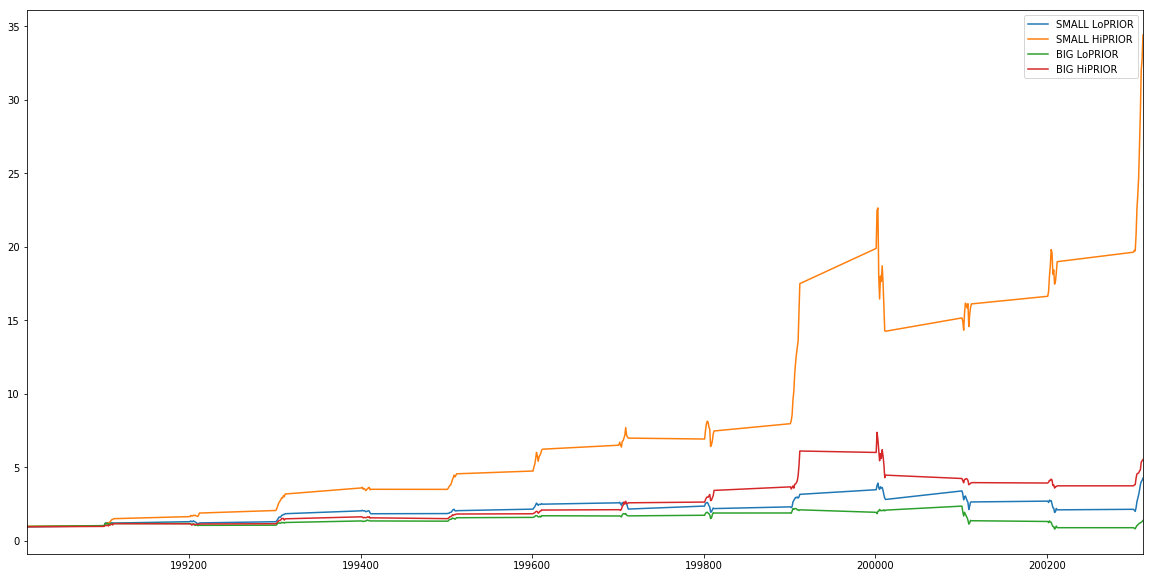

In [11]:
analyze(df.loc['199007':'200312'])

두번째 테이블을 보시면 역시나 값이 비슷한 트렌드를 보여줍니다. 소형주+고모멘텀 전략은 <span style="color:red">**복리가 30.82%로 1990-2008 보다 더 잘됩니다.**</span>

## 2004 년부터 2018 년까지 테스트

이 테이블은 누적 수익률을 보여줍니다. 마지막 5줄만 보여주도록 하겠습니다.


,SMALL LoPRIOR,ME1 PRIOR2,ME1 PRIOR3,ME1 PRIOR4,SMALL HiPRIOR,ME2 PRIOR1,ME2 PRIOR2,ME2 PRIOR3,ME2 PRIOR4,ME2 PRIOR5,ME3 PRIOR1,ME3 PRIOR2,ME3 PRIOR3,ME3 PRIOR4,ME3 PRIOR5,ME4 PRIOR1,ME4 PRIOR2,ME4 PRIOR3,ME4 PRIOR4,ME4 PRIOR5,BIG LoPRIOR,ME5 PRIOR2,ME5 PRIOR3,ME5 PRIOR4,BIG HiPRIOR
201808,1.904622,4.623230,7.867111,10.555887,13.103854,2.125029,3.860051,4.300133,5.015554,5.609688,2.210305,3.813506,4.053350,4.797951,4.941102,2.131941,4.260179,4.465123,4.109673,5.002413,2.194831,3.407505,3.890153,3.847198,4.026784
201809,1.896051,4.614908,7.833282,10.607611,13.052749,2.118867,3.844224,4.264872,4.954866,5.574908,2.183118,3.774227,4.021734,4.766764,4.940114,2.131515,4.261883,4.424491,4.096522,4.992908,2.210414,3.419772,3.909215,3.873744,4.062220
201810,1.704929,4.304787,7.305319,9.754759,11.824485,1.896174,3.527460,3.907049,4.506451,4.805013,1.964806,3.421337,3.663800,4.340139,4.348782,1.931792,3.906868,4.043542,3.772487,4.390264,2.045296,3.162264,3.635179,3.552998,3.605626
201811,1.684811,4.288859,7.262218,9.650383,11.702693,1.904138,3.549331,3.945338,4.549713,4.776183,1.998994,3.454182,3.660136,4.327986,4.320950,1.987427,3.911556,4.074677,3.841147,4.276557,2.096633,3.223295,3.712608,3.572895,3.556950
201812,1.526607,4.005365,6.854807,9.178479,10.934996,1.714867,3.244088,3.642336,4.231233,4.324356,1.796096,3.156431,3.398070,4.002089,3.964904,1.817900,3.595893,3.822455,3.573803,3.983185,1.910242,2.992185,3.444929,3.342443,3.336775


위의 테이블의 마지막 열을 꺼내 우선 5열/5행의 테이블로 나눠줍니다. 새 테이블에서 누적 수익률을 복리 퍼센트로 바꿔줍니다. 그리고, 모멘텀 차이를 보여줍니다.


,저모멘텀,2,3,4,고모멘텀,고-저
소형주,2.860466,9.692300,13.692814,15.927032,17.288269,14.427803
2,3.660991,8.161535,8.999708,10.094206,10.254103,6.593112
3,3.981314,7.964196,8.496440,9.686316,9.618077,5.636763
4,4.064994,8.906497,9.351017,8.861766,9.651699,5.586705
대형주,4.409311,7.580253,8.595547,8.377119,8.364857,3.955546


마지막으로 누적 수익률을 차트로 보시죠.


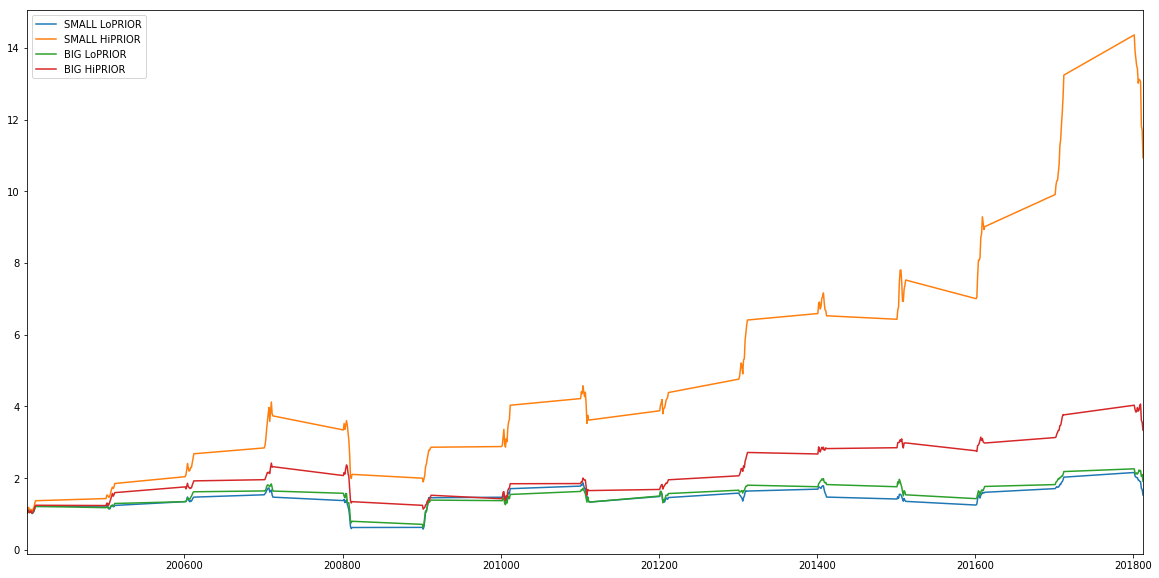

In [12]:
analyze(df.loc['200401':'201812'])

두번째 테이블을 보세요. 소형주+고모멘텀의 전략의 <span style="color:red">**복리가 17.55%로 낮아졌습니다.**</span>

대형주를 보시죠. 고모멘텀-저모멘텀의 차이가 아주 작아졌습니다. 즉, <span style="color:red">**소형주에서는 고모멘텀 전략이 먹히지만, 대형주에서는 먹히지 않습니다.**</span>

진짜 헬뉴스 (여기서는 테스트는 안함): <span style="color:red">**한국 중소형주에서는 모멘텀 전략이 잘 안먹힘 (강환국님이 증언해주심. 퀀트킹 자료에서도 모멘텀 전략의 회사를 골라주시지 않는게 그 이유.)**</span>

## 1월이 얼마나 안좋은지 테스트

In [13]:
df1 = df.loc[[year*100+1 for year in range(1991, 2019)],:] # df1은 매년 1월을 뽑은 데이터프레임 입니다
df1.head()

,SMALL LoPRIOR,ME1 PRIOR2,ME1 PRIOR3,ME1 PRIOR4,SMALL HiPRIOR,ME2 PRIOR1,ME2 PRIOR2,ME2 PRIOR3,ME2 PRIOR4,ME2 PRIOR5,...,ME4 PRIOR1,ME4 PRIOR2,ME4 PRIOR3,ME4 PRIOR4,ME4 PRIOR5,BIG LoPRIOR,ME5 PRIOR2,ME5 PRIOR3,ME5 PRIOR4,BIG HiPRIOR
199101,5.88,2.03,1.14,0.78,2.05,2.78,-0.36,0.08,-1.50,0.93,...,4.12,0.53,-0.30,0.32,1.00,5.78,3.06,2.76,2.45,3.04
199201,7.89,3.67,4.41,6.10,9.21,0.07,0.93,-0.44,2.38,3.48,...,-1.21,-1.03,-0.78,1.16,2.30,0.47,-0.53,-1.48,-1.54,-1.14
199301,6.49,4.61,4.73,6.46,9.15,1.50,1.59,1.16,3.20,4.71,...,2.05,0.79,1.20,2.06,1.58,1.07,0.83,0.44,0.71,1.72
199401,10.55,10.00,10.93,10.59,12.95,9.18,8.94,8.90,8.16,9.82,...,11.37,7.57,8.38,7.14,7.94,8.42,6.51,6.05,7.01,9.11
199501,0.67,0.01,0.04,0.39,-0.14,-2.21,0.15,-2.43,-2.55,-2.66,...,-1.96,-0.73,-0.87,-2.47,-3.89,-1.19,-0.93,-1.14,-2.06,-3.63


이 테이블은 누적 수익률을 보여줍니다. 마지막 5줄만 보여주도록 하겠습니다.


,SMALL LoPRIOR,ME1 PRIOR2,ME1 PRIOR3,ME1 PRIOR4,SMALL HiPRIOR,ME2 PRIOR1,ME2 PRIOR2,ME2 PRIOR3,ME2 PRIOR4,ME2 PRIOR5,ME3 PRIOR1,ME3 PRIOR2,ME3 PRIOR3,ME3 PRIOR4,ME3 PRIOR5,ME4 PRIOR1,ME4 PRIOR2,ME4 PRIOR3,ME4 PRIOR4,ME4 PRIOR5,BIG LoPRIOR,ME5 PRIOR2,ME5 PRIOR3,ME5 PRIOR4,BIG HiPRIOR
201401,3.576008,1.876121,1.920404,2.293909,2.951479,1.386188,1.198627,1.086269,1.229730,1.386577,1.268616,1.081949,1.057721,1.064245,1.182192,1.288101,1.027386,1.004634,0.980933,1.213537,1.292192,0.965525,0.961314,0.943930,1.086601
201501,3.443695,1.850231,1.909458,2.282899,2.907502,1.303433,1.176812,1.087029,1.220630,1.373266,1.212543,1.056307,1.042384,1.070950,1.199098,1.228205,1.009612,1.000415,0.984955,1.232832,1.248516,0.938587,0.942472,0.942892,1.096055
201601,3.181286,1.730521,1.798900,2.159394,2.706303,1.180258,1.088904,0.999306,1.143364,1.241707,1.095897,0.972753,0.971919,0.994698,1.075231,1.124299,0.936012,0.927385,0.918175,1.154301,1.161120,0.886495,0.881023,0.881698,1.014837
201701,3.386161,1.831583,1.904495,2.305585,2.975309,1.199969,1.121027,1.025788,1.167489,1.297211,1.125595,0.994445,0.999424,1.014890,1.112434,1.158477,0.963250,0.956226,0.948015,1.201050,1.195489,0.914420,0.906485,0.913792,1.066898
201801,3.603552,1.938181,2.017241,2.477120,3.227318,1.238728,1.160823,1.059741,1.222361,1.367650,1.148220,1.030743,1.038401,1.055283,1.175954,1.202731,1.004766,0.999926,0.994468,1.280800,1.237092,0.953100,0.952171,0.964325,1.143182


위의 테이블의 마지막 열을 꺼내 우선 5열/5행의 테이블로 나눠줍니다. 새 테이블에서 누적 수익률을 복리 퍼센트로 바꿔줍니다. 그리고, 모멘텀 차이를 보여줍니다.


,저모멘텀,2,3,4,고모멘텀,고-저
소형주,4.684707,2.391542,2.537851,3.292679,4.273252,-0.411455
2,0.767519,0.534026,0.207446,0.719665,1.124467,0.356948
3,0.494838,0.108200,0.134671,0.192359,0.580534,0.085696
4,0.661445,0.016981,-0.000265,-0.019810,0.887792,0.226347
대형주,0.762764,-0.171408,-0.174883,-0.129656,0.479055,-0.283708


마지막으로 누적 수익률을 차트로 보시죠.


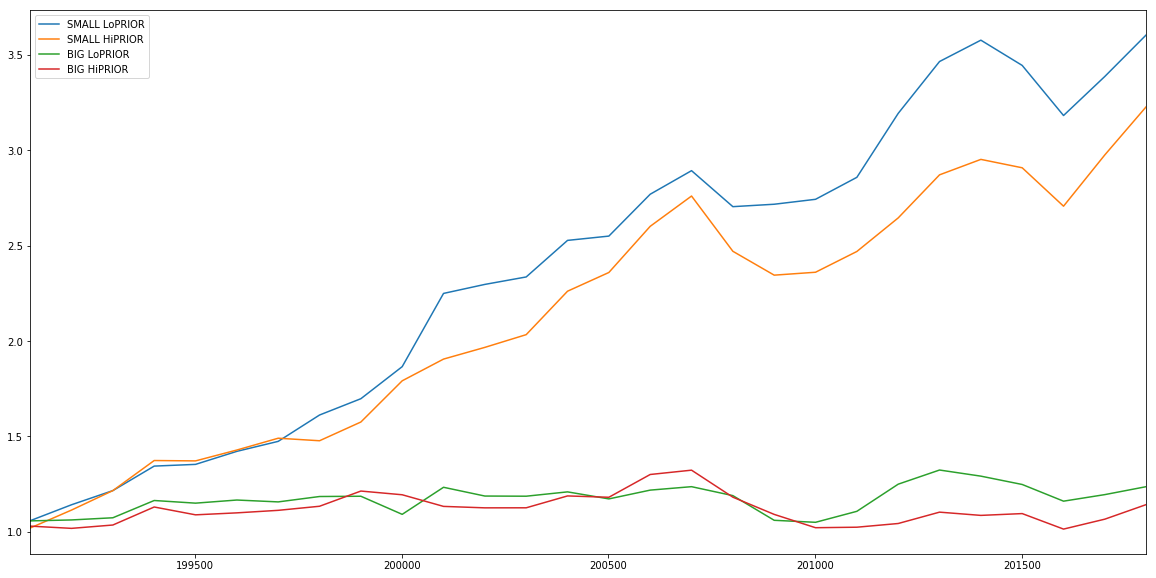

In [14]:
analyze(df1, weight=1)

숫자를 보면 아주 좋지 않습니다. 즉, <span style="color:red">**1월 저모멘텀주 매수, 고모멘텀주 매도 전략은 1990년 후에는 잘 안먹힘**</span> 이라고 하십니다.

하지만, <span style="color:red">**1월에도 소형주 자체의 수익은 높다**</span> 라고도 하시네요.

그런데, 개인적으로 1월의 백테스트를 저렇게 진행하는게 맞는지 모르겠습니다. 1월에 사거나 판다고 해도, 2~12월에도 계속 주식이 오르내리고 하는 것을 복리에 포함을 시켜줘야 하는데, 저렇게 1월만 필터링해서 계산을 하면 안되는거 아닌가요? 더 생각을 해봐야겠습니다.